In [82]:
#biblioteki
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Szeregi czasowe i ich analiza 
# ŚREDENI POZIOM ZJAWISKA, METODY INDEKSOWE 

Pewne przedsiębiorstwo produkowało samochody, a liczba sztuk wyprodukowanych w kolejnych dniach jest zapisana w zmiennej ile_sztuk. 

In [83]:
ile_sztuk=[12, 10, 16, 14, 16, 12, 10, 12, 16, 12, 12, 14]
t1 = range(1, 13)
a= {'t1':t1,  'ile_sztuk': ile_sztuk}
df_ile_sztuk = pd.DataFrame(data=a)
df_ile_sztuk

,t1,ile_sztuk
0,1,12
1,2,10
2,3,16
3,4,14
4,5,16
5,6,12
6,7,10
7,8,12
8,9,16
9,10,12


Przedsiębiorstwo weszło na giełdę i ceny akcji w kolejnych dniach zaprezentowane są w zmiennej dane_akcje.

In [84]:
cena_akcji=[42.9, 41.3, 40, 41.5, 41.6, 42, 41.7, 44, 43.5,  ]
t2 = range(1, 10)
b= {'t2':t2,  'cena_akcji': cena_akcji}
df_cena_akcji = pd.DataFrame(data=b)
df_cena_akcji

,t2,cena_akcji
0,1,42.9
1,2,41.3
2,3,40.0
3,4,41.5
4,5,41.6
5,6,42.0
6,7,41.7
7,8,44.0
8,9,43.5


Dzięki badaniom oceniającym wpływ hałasu na słuch i ogólny stan zdrowia opracowano dopuszczalne normy poziomu hałasu w zakładzie pracy. Wynoszą one 85 dB dla dziennej (8 godzin) i tygodniowej ekspozycji, pracownicy sprawdzają więc codziennie poziom hałasu na hali produkcyjnej; dane zawarte sa w wektorze halas.


In [85]:
# Prosze zrobic tabele dla hałasu
halas=[82, 90, 70, 65, 75, 89, 87, 83, 86]
#....



Wyróżniamy szeregi czasowe:
- momentów
- okresów

    Szereg czasowy momentów występuje wówczas, gdy pomiaru badanego zjawiska dokonuje się w pewnych ściśle określonych momentach. (np.poziom zanieczyszczenia powietrza, czy poziom hałasu). 
    
    Szereg czasowy okresów to szereg czasowy zawierający informacje o rozmiarach zjawiska w pewnych okresach, na przykład: rok, półrocze, kwartał, miesiąc. (np. wielkość produkcji przedsiębiorstwa w kolejnych miesiącach). 

Proszę określić, czy powyżej przedstawione szeregi są to szeregi czasowe momentów, czy okresów.

Odp: Ilość samohcodów-okresów
Cena na giełdzie-momentów
Poziom hałasu-okresów

Proszę wyliczyć średni poziom zjawiska dla szeregów.

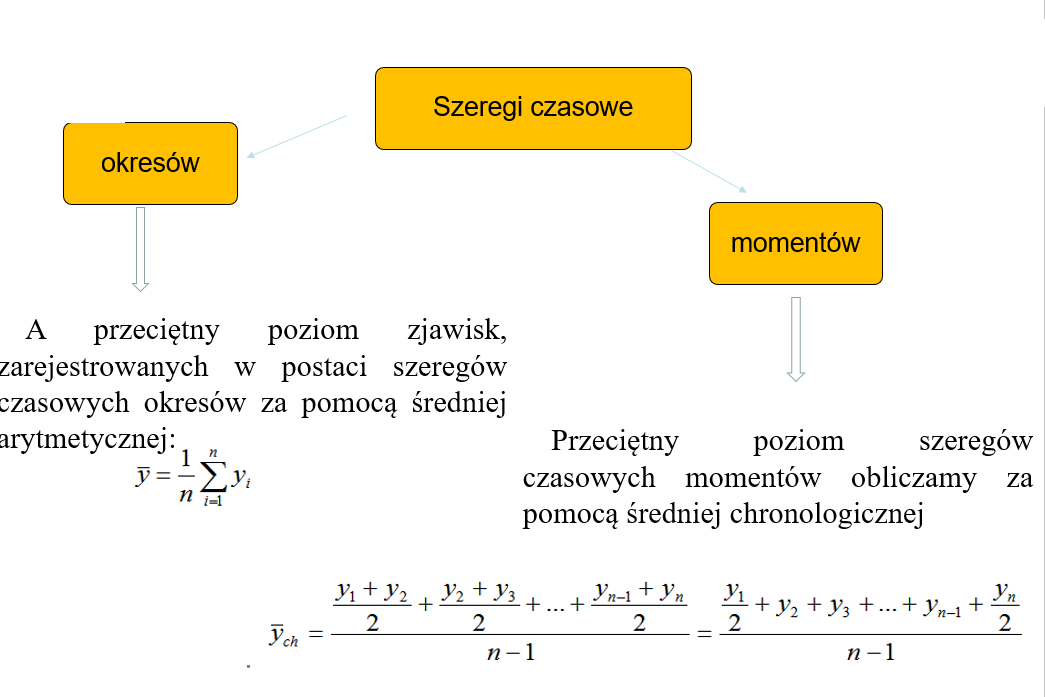

Ale gdy liczymy średni poziom dźwięku

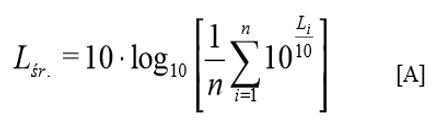

In [86]:
#proszę wyliczyć średni poziom zjawiska we wszystkich trzech przypadkach
# dla produkcji samochodów
df_ile_sztuk
df_cena_akcji
halas
n_ile_sztuk = len(df_ile_sztuk)
ile_sztuk_srednia = np.mean(df_ile_sztuk["ile_sztuk"])
print(f"srednia ilosci sztuk samohodow: {round(ile_sztuk_srednia,2)}")
sredni_poziom_dzwieku = 0
for i in halas:
    sredni_poziom_dzwieku +=10**(i/10)
sredni_poziom_dzwieku = sredni_poziom_dzwieku/len(halas)
sredni_poziom_dzwieku = 10*np.log10(sredni_poziom_dzwieku)
srednia_cena_akcji = 0
for i in df_cena_akcji["cena_akcji"]:
    srednia_cena_akcji += i
srednia_cena_akcji -= df_cena_akcji["cena_akcji"][0]/2
srednia_cena_akcji -= df_cena_akcji["cena_akcji"][len(df_cena_akcji)-1]/2
srednia_cena_akcji = srednia_cena_akcji/(len(df_cena_akcji)-1)
print(f"średnia cena akcji: {round(srednia_cena_akcji,2)}")
print(f"Średni poziom dźwięku: {round(sredni_poziom_dzwieku,2)}")


srednia ilosci sztuk samohodow: 13.0
średnia cena akcji: 41.91
Średni poziom dźwięku: 85.37


# Wizualizacja szeregów i wyznaczonych powyżej średnich

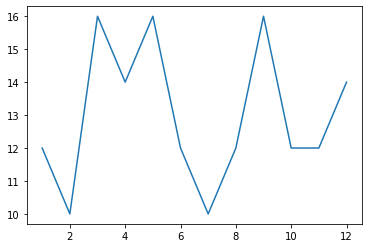

In [87]:
plt.plot(t1, ile_sztuk)

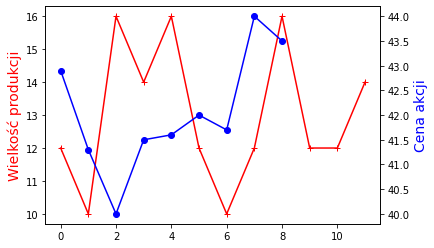

In [88]:
fig,ax = plt.subplots()
ax.plot( df_ile_sztuk.ile_sztuk, color="red", marker="+")
ax.set_ylabel("Wielkość produkcji",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(df_cena_akcji.cena_akcji,color="blue",marker="o")
ax2.set_ylabel("Cena akcji",color="blue",fontsize=14)
plt.show()

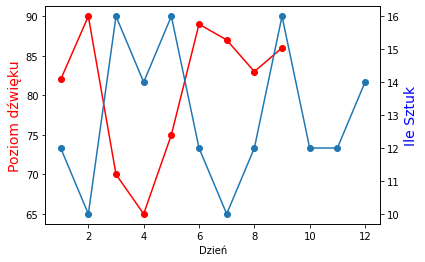

Text(0.5, 0, 'Dzień')

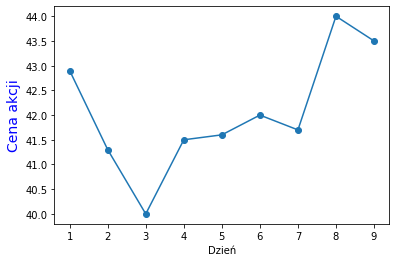

In [97]:
#  Wykorzystując Multiple Y-Axis Scales
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
#  proszę na jednym wykresie narysować hałas i wielkość produkcji, 
#  a na drugim wykorzystujac plot osobno ceny akcji
#  proszę, aby były i linie, i znaczniki (marker)
fig, ax  = plt.subplots()
ax.plot(t2, halas, color="red", marker="o")
ax.set_ylabel("Poziom dźwięku",color="red",fontsize=14)
ax.set_xlabel("Dzień")
ax2 = ax.twinx()
ax2.plot(t1, df_ile_sztuk["ile_sztuk"], marker="o")
ax2.set_ylabel("Ile Sztuk",color="blue",fontsize=14)
plt.show()
fig, ax = plt.subplots()
ax.plot(t2,cena_akcji, marker="o")
ax.set_ylabel("Cena akcji", color="blue", fontsize=14)
ax.set_xlabel("Dzień")


# Wskaźniki dynamiki dla cen akcji




Stosuje się dla zjawisk jednorodnych, które można sumować i porównywać w naturalnych jednostkach i istnieje możliwość wydłużania okresów.

Dla szeregu z ceną akcji proszę policzyć przyrosty absolutne i względne (w procentach), wskaźniki dynamiki  jednopodstawowe i łańcuchowe

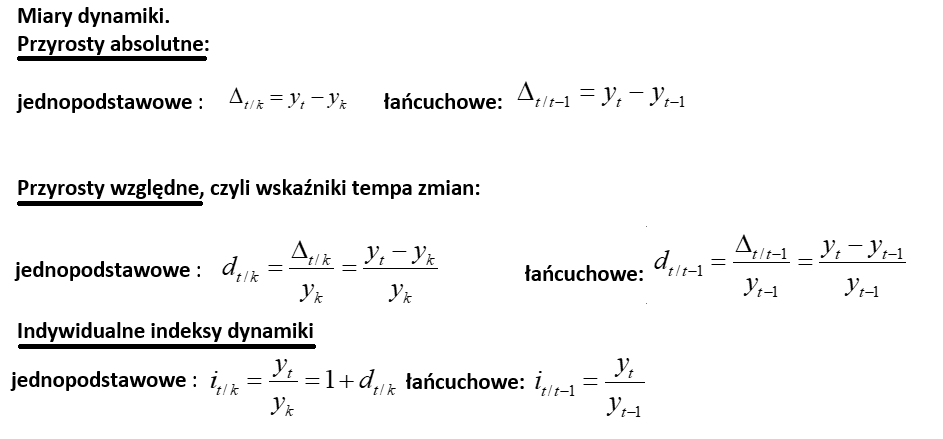

In [105]:
# dla akcji
df_cena_akcji['p_absol_j'] = df_cena_akcji['cena_akcji']-df_cena_akcji.loc[0,'cena_akcji']
df_cena_akcji['p_absol_l'] = df_cena_akcji['cena_akcji'].diff(1)
df_cena_akcji['p_wzgl_j'] = df_cena_akcji['p_absol_j']/df_cena_akcji.loc[0, 'cena_akcji']
df_cena_akcji['p_wzgl_l'] = df_cena_akcji['p_absol_l']/df_cena_akcji['cena_akcji'].shift(1)
df_cena_akcji['i_dyn_j'] = df_cena_akcji['cena_akcji']/df_cena_akcji['cena_akcji'][0]
df_cena_akcji['i_dyn_l'] = df_cena_akcji['cena_akcji']/df_cena_akcji['cena_akcji'].shift(1)
df_cena_akcji

,t2,cena_akcji,p_absol_j,p_absol_l,p_wzgl_j,p_wzgl_l,i_dyn_j,i_dyn_l
0,1,42.9,0.0,NaN,0.000000,NaN,1.000000,NaN
1,2,41.3,-1.6,-1.6,-0.037296,-0.037296,0.962704,0.962704
2,3,40.0,-2.9,-1.3,-0.067599,-0.031477,0.932401,0.968523
3,4,41.5,-1.4,1.5,-0.032634,0.037500,0.967366,1.037500
4,5,41.6,-1.3,0.1,-0.030303,0.002410,0.969697,1.002410
5,6,42.0,-0.9,0.4,-0.020979,0.009615,0.979021,1.009615
6,7,41.7,-1.2,-0.3,-0.027972,-0.007143,0.972028,0.992857
7,8,44.0,1.1,2.3,0.025641,0.055156,1.025641,1.055156
8,9,43.5,0.6,-0.5,0.013986,-0.011364,1.013986,0.988636


**Przyrosty absolutne:**

Interpretacja: 

Przyrosty absolutne informują o tym, o ile jednostek wzrósł (znak plus) lub zmalał (znak minus) poziom badanego zjawiska w okresie (momencie) badanym w porównaniu z okresem (momentem) przyjętym za podstawę. 

odp: Analizując ostatni wiersz można powiedzieć, że cena akcji wzrosła o 0,6 groszy w stosunku do dnia pierwszego i zmalała o  0,5 groszy od dnia poprzedniego. 

**Przyrosty względne:**

Interpretacja: 

Przyrosty względne wyrażane są w procentach. 

Informują o ile procent wyższy lub niższy jest poziom badanego zjawiska w danym okresie w stosunku do okresu przyjętego za podstawę (przyrosty względne jednopodstawowe) lub w stosunku do okresu bezpośrednio poprzedzającego (przyrosty względne łańcuchowe). 

odp: W stosunku do pierwszej sesji mamy wzrost o 1,4%, ale w stosunku do poprzedniego dnia mamy zanotowany spadek ceny o 1,1%.

**Indeksy**

Interpretacja: 

Do interpretacji należy zawsze odjąć od indeksu jeden i pomnożyć wynik przez 100%. Otrzymamy w ten sposób przyrost względny w %. Tak „spreparowany” indeks dynamiki informuje o ile % wzrósł (znak plus) lub zmalał (znak minus) poziom badanego zjawiska w okresie t w stosunku do poziomu z okresu t* będącego podstawą porównania.

odp: Indeks dynamiki w stosunku do piewszego dnia sesji  1,014, a w stosunku do dnia poprzedniego 0,989.


**Indeksy**

Interpretacja: 

*Do interpretacji należy zawsze odjąć od indeksu jeden i pomnożyć wynik przez 100%. Otrzymamy w ten sposób przyrost względny w %. Tak „spreparowany” indeks dynamiki informuje o ile % wzrósł (znak plus) lub zmalał (znak minus) poziom badanego zjawiska w okresie t w stosunku do poziomu z okresu t będącego podstawą porównania.*

odp: Indeks dynamiki w stosunku do piewszego dnia sesji  ..., a w stosunku do dnia poprzedniego ....

**Proszę dokonać analizy w 5. dniu sprzedaży akcji.**

Odp:

In [ ]:
#Proszę dokonać analizy w 5. dniu sprzedaży akcji.


#Odp:

# Proszę policzyć, o ile procent przeciętnie w całym badanym odcinku czasu zmieniał się poziom zjawiska i jaka jest prognoza na dzień następny (h=1).
# Obliczenia proszę wykonać dla wielkości produkcji i dla cen akcji.


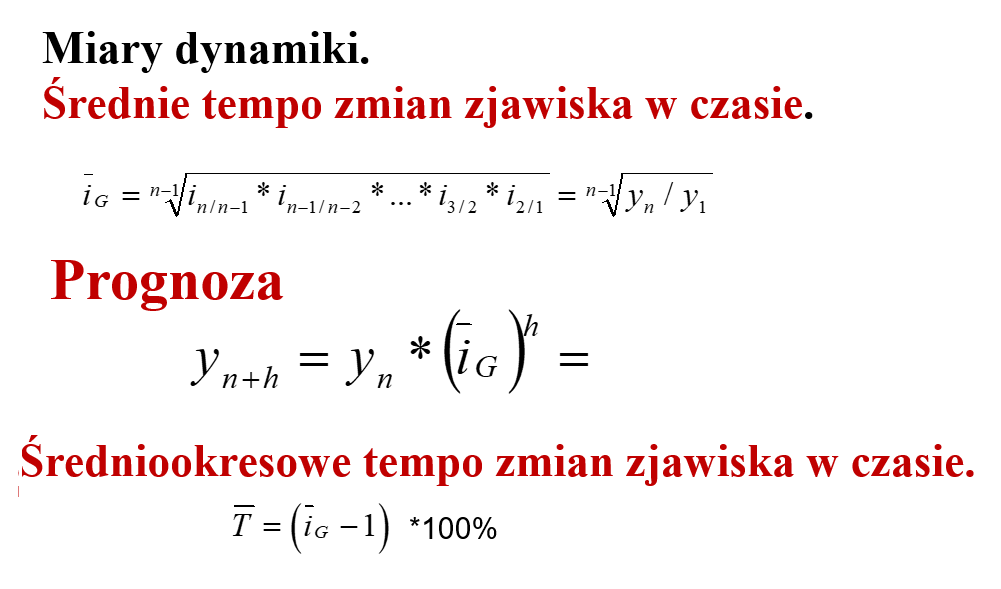

Średnie tempo zmian wyrażone w procentach ( czyli należy pomnożyć iG przez 100% ) określa, jaki jest przeciętny okresowy przyrost procentowy analizowanego zjawiska w badanym przedziale czasowym.
Jeśli średnia geometryczna indeksów łańcuchowych iG sprzedanych  elementów wynosi 105.05%, to oznacza, że liczba sprzedanych  elementów rosła z miesiąca na miesiąc przeciętnie o 5.05%.
Średniookresowe tempo zmian (zwane również średnim lub średniorocznym tempem zmian czy wzrostu) mówi nam jak średnio zmieniają się wartości z okresu na okres.

In [108]:
# Proszę policzyć, o ile procent przeciętnie w całym badanym odcinku czasu 
# zmieniał się poziom zjawiska i jaka jest prognoza na dzień następny (h=1). 
# Obliczenia proszę wykonać dla wielkości produkcji 
ig = np.sqrt(df_ile_sztuk['ile_sztuk'][len(df_ile_sztuk)-1]/df_ile_sztuk['ile_sztuk'][0])
ykolejne = df_ile_sztuk['ile_sztuk'][len(df_ile_sztuk)-1]*ig
T = (ig-1)*100
print(f"średnie tempo zmian: {round(ig,2)}")
print(f"prognoza na dzien kolejny: {round(ykolejne,2)}")
print(f"średniookresowe tempo: {round(T,2)}")

ig = np.sqrt(cena_akcji[len(cena_akcji)-1]/cena_akcji[0])
ykolejne = cena_akcji[len(cena_akcji)-1]*ig
T = (ig-1)*100
print(f"średnie tempo zmian cen akcji: {round(ig,2)}")
print(f"prognoza na dzien kolejny ceny akcji: {round(ykolejne,2)}")
print(f"średniookresowe tempo cen akcji: {round(T,2)}")


średnie tempo zmian: 1.08
prognoza na dzien kolejny: 15.12
średniookresowe tempo: 8.01
średnie tempo zmian cen akcji: 1.01
prognoza na dzien kolejny ceny akcji: 43.8
średniookresowe tempo cen akcji: 0.7
